# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [82]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
import numpy as np
from pathlib import Path
from dotenv import load_dotenv

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)
map_box_api

'pk.eyJ1Ijoibml0aW5qdCIsImEiOiJja3g5cjJneTAzcDU5MnZxb2p6cjkxeTZiIn0.-tW8zsxqlGmvDcOsUrCwgw'

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("toronto_neighbourhoods_census_data.csv")
housing_data = pd.read_csv(file_path, index_col="year")
housing_data.reset_index(inplace=True)
housing_data

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2016,Wychwood,920,1295,0,880,290,395,2080,35,787760,1864,1146
556,2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,1127052,2398,1535
557,2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0,1131888,2192,1619
558,2016,York University Heights,1235,5505,0,1360,775,280,995,0,425769,1444,1122


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [4]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwelling_type_data = housing_data[['single_detached_house',
                     'apartment_five_storeys_plus',
                     'movable_dwelling',
                     'semi_detached_house',
                     'row_house',	
                     'duplex',	
                     'apartment_five_storeys_less',	
                     'other_house',
                     'year']]
dwelling_type_data

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,year
0,3715,1480,0,1055,1295,195,185,5,2001
1,3250,1835,0,545,455,105,425,0,2001
2,3175,315,0,470,50,185,370,0,2001
3,1060,6090,5,1980,605,275,3710,165,2001
4,3615,4465,0,240,380,15,1360,0,2001
...,...,...,...,...,...,...,...,...,...
555,920,1295,0,880,290,395,2080,35,2016
556,1400,1995,0,465,60,310,1445,0,2016
557,520,4315,0,450,220,130,1370,0,2016
558,1235,5505,0,1360,775,280,995,0,2016


In [5]:
# Create a bar chart per year to show the number of dwelling types
group_by_year_data = dwelling_type_data.groupby('year').sum()
group_by_year_data


,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [6]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color, rot, height, width):

    return data.hvplot.bar(title = title, 
                           xlabel=xlabel, 
                           ylabel=ylabel, 
                           color=color, 
                           rot=rot, 
                           height=height, 
                           width=width)

In [7]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
year_2001 = group_by_year_data.loc[2001]
#year_2001

create_bar_chart(data = year_2001, 
                 title = "Dwelling Types in Toronto in 2001", 
                 xlabel="Year", 
                 ylabel="Dwelling Type Units", 
                 color="red", 
                 rot=90, 
                 height=500,
                 width=500).opts(yformatter="%.0f")

:Bars   [index]   (2001)

In [8]:
# Bar chart for 2006
year_2006 = group_by_year_data.loc[2006]
year_2006
create_bar_chart(data = year_2006, 
                 title = "Dwelling Types in Toronto in 2006", 
                 xlabel="Year", 
                 ylabel="Dwelling Type Units", 
                 color="blue", 
                 rot=90, 
                 height=500,
                 width=500).opts(yformatter="%.0f")

:Bars   [index]   (2006)

In [9]:
# Bar chart for 2011
year_2011 = group_by_year_data.loc[2011]
year_2011
create_bar_chart(data = year_2011, 
                 title = "Dwelling Types in Toronto in 2011", 
                 xlabel="Year", 
                 ylabel="Dwelling Type Units", 
                 color="orange", 
                 rot=90, 
                 height=500,
                 width=500).opts(yformatter="%.0f")

:Bars   [index]   (2011)

In [10]:
# Bar chart for 2016
year_2016 = group_by_year_data.loc[2016]
year_2016
create_bar_chart(data = year_2016, 
                 title = "Dwelling Types in Toronto in 2016", 
                 xlabel="Year", 
                 ylabel="Dwelling Type Units", 
                 color="green", 
                 rot=90, 
                 height=500,
                 width=500).opts(yformatter="%.0f")

:Bars   [index]   (2016)

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [11]:
# Calculate the average monthly shelter costs for owned and rented dwellings
#Creating data slices for rented and owned properties
shelter_cost_owned_data = housing_data[[
                     'shelter_costs_owned',
                     'year']]
shelter_owned_mean = shelter_cost_owned_data.groupby('year').mean()

In [12]:
shelter_cost_rented_data = housing_data[[
                     'shelter_costs_owned',
                     'year']]
shelter_rented_mean = shelter_cost_rented_data.groupby('year').mean()

In [13]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color, rot, height, width):

    return data.hvplot(title = title, 
                           xlabel=xlabel, 
                           ylabel=ylabel, 
                           color=color, 
                           rot=rot, 
                           height=height, 
                           width=width)

In [14]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(data = shelter_owned_mean, 
                 title = "Average Monthly Shelter Cost for Owned Dwellings in Toronto", 
                 xlabel="Year", 
                 ylabel="Average Monthly Shelter Costs", 
                 color="orange", 
                 rot=0, 
                 height=500,
                 width=500).opts(yformatter="%.0f")

:Curve   [year]   (shelter_costs_owned)

In [15]:
# Line chart for rented dwellings
create_line_chart(data = shelter_rented_mean, 
                 title = "Average Monthly Shelter Cost for Owned Dwellings in Toronto", 
                 xlabel="Year", 
                 ylabel="Average Monthly Shelter Costs", 
                 color="purple", 
                 rot=0, 
                 height=500,
                 width=500).opts(yformatter="%.0f")

:Curve   [year]   (shelter_costs_owned)

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [16]:
# Calculate the average house value per year
average_house_value = housing_data[[
                     'average_house_value',
                     'year']]
average_house_value_mean = average_house_value.groupby('year').mean()

In [17]:
# Plot the average house value per year as a line chart
create_line_chart(data = average_house_value_mean, 
                 title = "Average House Value in Toronto", 
                 xlabel="Year", 
                 ylabel="Average House Value", 
                 color="purple", 
                 rot=0, 
                 height=500,
                 width=500).opts(yformatter="%.0f")

:Curve   [year]   (average_house_value)

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [18]:
# Create a new DataFrame with the mean house values by neighbourhood per year
average_house_value_neighbourhood = housing_data[[
                     'year',                 
                     'average_house_value',
                     'neighbourhood']]
#average_house_value_neighbourhood_data = average_house_value_neighbourhood.groupby('neighbourhood').mean()
average_house_value_neighbourhood

,year,average_house_value,neighbourhood
0,2001,200388,Agincourt North
1,2001,203047,Agincourt South-Malvern West
2,2001,259998,Alderwood
3,2001,453850,Annex
4,2001,371864,Banbury-Don Mills
...,...,...,...
555,2016,787760,Wychwood
556,2016,1127052,Yonge-Eglinton
557,2016,1131888,Yonge-St.Clair
558,2016,425769,York University Heights


In [19]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

#creating a list of the neighbourhood
# neighbourhood_list = average_house_value_neighbourhood[['neighbourhood']]


# def choose_neighbourhood(neighbourhood):

#    return data.hvplot(#title = title,
#     #                    data=data,
#     #                    xlabel=xlabel, 
#     #                    ylabel=ylabel, 
#     #                    color=color, 
#     #                    rot=rot, 
#     #                    height=height, 
#     #                    width=width,
#     #                    groupby = groupby
#                               )

In [20]:
average_house_value_neighbourhood.hvplot.line(
                 title = "Average Prices per Neighbourhood", 
                 xlabel="Year", 
                 ylabel="Avg house Value", 
                 #color="green",
                 x = 'year',
                 rot=90, 
                 height=500,
                 width=800,
                 groupby = 'neighbourhood'
                 ).opts(yformatter="%.0f")

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [21]:
# Fetch the data of all dwelling types per year
dwelling_per_type = housing_data[['single_detached_house',
                     'apartment_five_storeys_plus',
                     'movable_dwelling',
                     'semi_detached_house',
                     'row_house',	
                     'duplex',	
                     'apartment_five_storeys_less',	
                     'other_house', 'neighbourhood',
                     'year']]
dwelling_per_type


,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,neighbourhood,year
0,3715,1480,0,1055,1295,195,185,5,Agincourt North,2001
1,3250,1835,0,545,455,105,425,0,Agincourt South-Malvern West,2001
2,3175,315,0,470,50,185,370,0,Alderwood,2001
3,1060,6090,5,1980,605,275,3710,165,Annex,2001
4,3615,4465,0,240,380,15,1360,0,Banbury-Don Mills,2001
...,...,...,...,...,...,...,...,...,...,...
555,920,1295,0,880,290,395,2080,35,Wychwood,2016
556,1400,1995,0,465,60,310,1445,0,Yonge-Eglinton,2016
557,520,4315,0,450,220,130,1370,0,Yonge-St.Clair,2016
558,1235,5505,0,1360,775,280,995,0,York University Heights,2016


In [22]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
dwelling_per_type.hvplot.bar(
                 title = "Dwelling Types in the Locality", 
                 xlabel="Year", 
                 ylabel="Dwelling Type Units", 
                 #color="green",
                 x = 'year',
                 rot=90, 
                 height=500,
                 width=800,
                 groupby = 'neighbourhood'
                 ).opts(yformatter="%.0f")

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [23]:
# Getting the data from the top 10 expensive neighbourhoods
expensive_neighbourhood = housing_data[['average_house_value',
                     'neighbourhood',
                    ]]
top10_dataset = expensive_neighbourhood.groupby('neighbourhood').sum()
top10_dataset

,average_house_value
neighbourhood,
Agincourt North,1319246
Agincourt South-Malvern West,1336756
Alderwood,1711690
Annex,2987908
Banbury-Don Mills,2448156
...,...
Wychwood,2263906
Yonge-Eglinton,3238983
Yonge-St.Clair,3252881


In [24]:
top10_expensive_neighbourhood_grouped = top10_dataset.nlargest(10, 'average_house_value')

top10_expensive_neighbourhood_grouped

,average_house_value
neighbourhood,
Bridle Path-Sunnybrook-York Mills,6105943
Forest Hill South,4783970
Lawrence Park South,4376111
Rosedale-Moore Park,4374560
St.Andrew-Windfields,3996428
Casa Loma,3924257
Bedford Park-Nortown,3721661
Forest Hill North,3406722
Kingsway South,3372937


In [25]:
# Plotting the data from the top 10 expensive neighbourhoods
create_bar_chart(data = top10_expensive_neighbourhood_grouped, 
                 title = "Top 10 Expensive Neighbourhoods in Toronto", 
                 xlabel="Neighbourhood", 
                 ylabel="Average House Value", 
                 color="purple", 
                 rot=90, 
                 height=500,
                 width=800
                 ).opts(yformatter="%.0f")

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [26]:
# Load neighbourhoods coordinates data
file_path = Path("toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [27]:
# Calculate the mean values for each neighborhood
neighbourhood_avg_map = housing_data[['neighbourhood',
                     'average_house_value',

                     ]]
neighbourhood_avg_map_mean = neighbourhood_avg_map.groupby('neighbourhood').mean()
neighbourhood_avg_map_mean

,average_house_value
neighbourhood,
Agincourt North,329811.50
Agincourt South-Malvern West,334189.00
Alderwood,427922.50
Annex,746977.00
Banbury-Don Mills,612039.00
...,...
Wychwood,565976.50
Yonge-Eglinton,809745.75
Yonge-St.Clair,813220.25


In [28]:
# Join the average values with the neighbourhood locations
location_value_map_join = neighbourhood_avg_map_mean.join(df_neighbourhood_locations.set_index('neighbourhood'), on='neighbourhood')
location_value_map_join

,average_house_value,lat,lon
neighbourhood,,,
Agincourt North,329811.50,43.805441,-79.266712
Agincourt South-Malvern West,334189.00,43.788658,-79.265612
Alderwood,427922.50,43.604937,-79.541611
Annex,746977.00,43.671585,-79.404001
Banbury-Don Mills,612039.00,43.737657,-79.349718
...,...,...,...
Wychwood,565976.50,43.676919,-79.425515
Yonge-Eglinton,809745.75,43.704689,-79.403590
Yonge-St.Clair,813220.25,43.687859,-79.397871


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

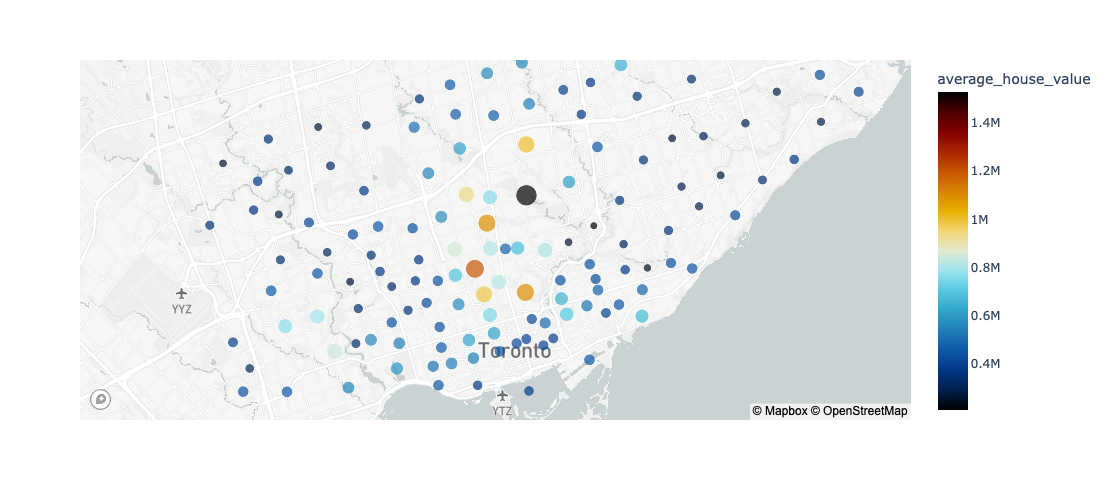

In [36]:
# Create a scatter mapbox to analyze neighbourhood info
location_value_map = px.scatter_mapbox(
                    location_value_map_join, 
                    lat="lat", 
                    lon="lon",     
                    color="average_house_value", 
                    size="average_house_value",
                    color_continuous_scale=px.colors.cyclical.IceFire, 
                    size_max=15, zoom=10, height=500, width=1100)
location_value_map.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [38]:
dwelling_value_toronto = housing_data[[
                     'neighbourhood',
                     'average_house_value',                  
                     'year']]
dwelling_value_toronto

,neighbourhood,average_house_value,year
0,Agincourt North,200388,2001
1,Agincourt South-Malvern West,203047,2001
2,Alderwood,259998,2001
3,Annex,453850,2001
4,Banbury-Don Mills,371864,2001
...,...,...,...
555,Wychwood,787760,2016
556,Yonge-Eglinton,1127052,2016
557,Yonge-St.Clair,1131888,2016
558,York University Heights,425769,2016


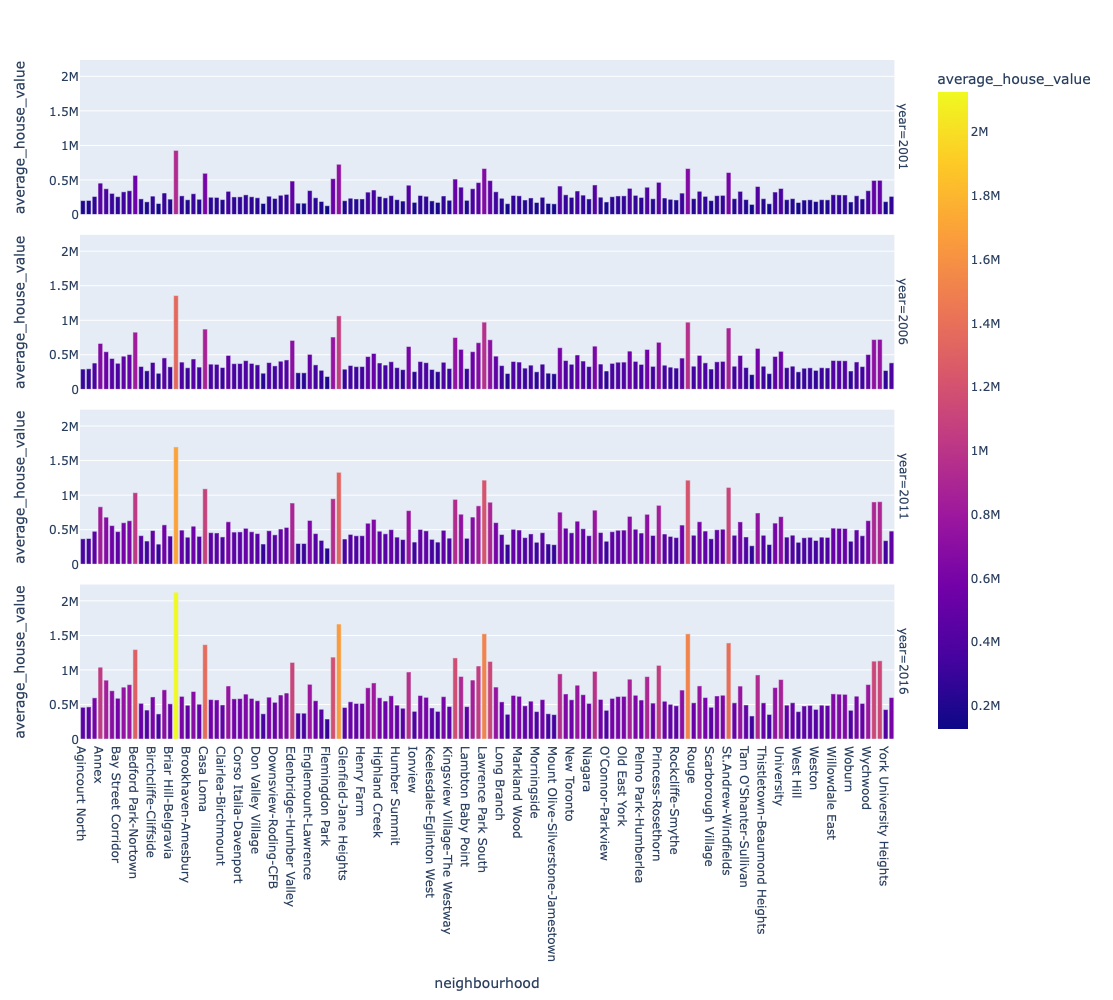

In [41]:
dwelling_value_toronto_map = px.bar(dwelling_value_toronto, 
                                    x="neighbourhood", 
                                    y="average_house_value", 
                                    color="average_house_value", 
                                    facet_row="year",
                                    height=1000,
                                    width = 1000)
dwelling_value_toronto_map.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [78]:
# Fetch the data from all expensive neighbourhoods per year.
expensive_neighbourhood_opt = housing_data[['average_house_value',
                     'neighbourhood','year'
                    ]]
top10_dataset_opt = expensive_neighbourhood_opt.groupby('neighbourhood').mean()
top10_dataset_opt

,average_house_value,year
neighbourhood,,
Agincourt North,329811.50,2008.5
Agincourt South-Malvern West,334189.00,2008.5
Alderwood,427922.50,2008.5
Annex,746977.00,2008.5
Banbury-Don Mills,612039.00,2008.5
...,...,...
Wychwood,565976.50,2008.5
Yonge-Eglinton,809745.75,2008.5
Yonge-St.Clair,813220.25,2008.5


In [79]:
top10_expensive_neighbourhood_grouped_opt = expensive_neighbourhood_opt.nlargest(100, 'average_house_value')
top10_expensive_neighbourhood_grouped_opt

,average_house_value,neighbourhood,year
436,2124653,Bridle Path-Sunnybrook-York Mills,2016
296,1697067,Bridle Path-Sunnybrook-York Mills,2011
464,1664653,Forest Hill South,2016
489,1522732,Lawrence Park South,2016
524,1522193,Rosedale-Moore Park,2016
...,...,...,...
506,641047,Newtonbrook West,2016
454,636899,Dufferin Grove,2016
530,633325,South Riverdale,2016
515,632812,Parkwoods-Donalda,2016


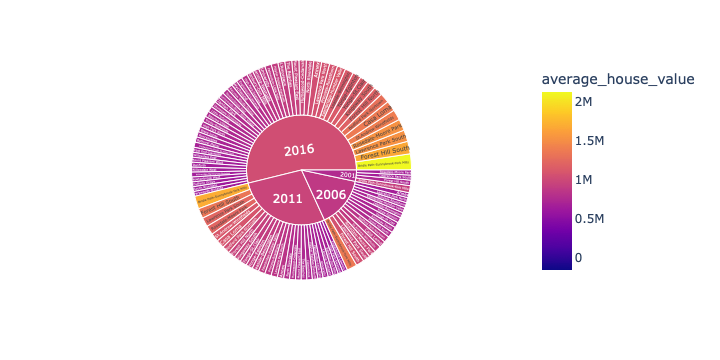

In [86]:
# Create the sunburst chart
expensive_sunburst = px.sunburst(top10_expensive_neighbourhood_grouped_opt, 
                                 path=['year', 'neighbourhood'], 
                                 values='average_house_value',
                                 color='average_house_value', 
                                 color_continuous_midpoint=np.average(top10_expensive_neighbourhood_grouped_opt['average_house_value'], 
                                 weights=top10_expensive_neighbourhood_grouped_opt['average_house_value']))
expensive_sunburst.show()